In [2]:
import numpy as np
import pandas as pd

In [3]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [4]:
X.shape

(3, 3)

In [6]:
X = X - np.mean(X,axis=0)

In [7]:
X

array([[-3., -3., -3.],
       [ 0.,  0.,  0.],
       [ 3.,  3.,  3.]])

In [10]:
cov = np.cov(X.T)

In [11]:
cov

array([[9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.]])

In [12]:
eigenvalues,eigenvectors = np.linalg.eig(cov)

In [16]:
eigenvectors

array([[-5.77350269e-01,  8.04908467e-01,  1.09446620e-16],
       [-5.77350269e-01, -5.21162995e-01,  7.07106781e-01],
       [-5.77350269e-01, -2.83745472e-01, -7.07106781e-01]])

In [14]:
eigenvalues

array([ 2.70000000e+01, -2.05116020e-15,  1.76986475e-32])

In [17]:
idxs = np.argsort(eigenvalues)[::-1]

In [18]:
idxs

array([0, 2, 1], dtype=int64)

In [19]:
explained_variances = []
for i in range(len(eigenvalues)):
    explained_variances.append(eigenvalues[i] / np.sum(eigenvalues))
 
print(np.sum(explained_variances), "\n", explained_variances)

1.0000000000000002 
 [1.0000000000000002, -7.596889625219018e-17, 6.555054622018485e-34]


In [21]:
eigenvectors = eigenvectors.T
components = eigenvectors[0:1]
print(components)

[[-5.77350269e-01  8.04908467e-01  1.09446620e-16]]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

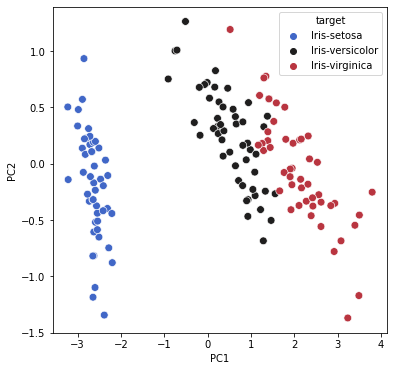

In [22]:
from PCA import PCA
import matplotlib.pyplot as plt
import seaborn as sb

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(2).fit_transform(x)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')


In [23]:
principal_df

,PC1,PC2,target
0,-2.684207,-0.326607,Iris-setosa
1,-2.715391,0.169557,Iris-setosa
2,-2.889820,0.137346,Iris-setosa
3,-2.746437,0.311124,Iris-setosa
4,-2.728593,-0.333925,Iris-setosa
...,...,...,...
145,1.944017,-0.187415,Iris-virginica
146,1.525664,0.375021,Iris-virginica
147,1.764046,-0.078519,Iris-virginica
148,1.901629,-0.115877,Iris-virginica
